In [32]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

In [2]:
#pip install pandas-datareader

In [3]:
style.use('ggplot')

In [155]:
start = dt.datetime(2010, 1, 3)
end = dt.datetime(2021,11,20)

In [156]:
#print(web.DataReader("TSLA",'yahoo',start,end))

In [157]:
prices = web.DataReader("AAPL", 'yahoo', start, end)
returns = prices.pct_change()

In [158]:
last_price = prices[:-1]

In [159]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2952 entries, 2010-01-04 to 2021-09-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2952 non-null   float64
 1   Low        2952 non-null   float64
 2   Open       2952 non-null   float64
 3   Close      2952 non-null   float64
 4   Volume     2952 non-null   float64
 5   Adj Close  2952 non-null   float64
dtypes: float64(6)
memory usage: 161.4 KB


In [169]:
#Number of simulations
num_simulations = 10
num_days = 252

In [170]:
simulation_df = pd.DataFrame()

In [171]:
for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
               break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count =+ 1

In [172]:
simulation_df[x] = price_series

In [174]:
simulation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   9       253 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


In [176]:
simulation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   9       253 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


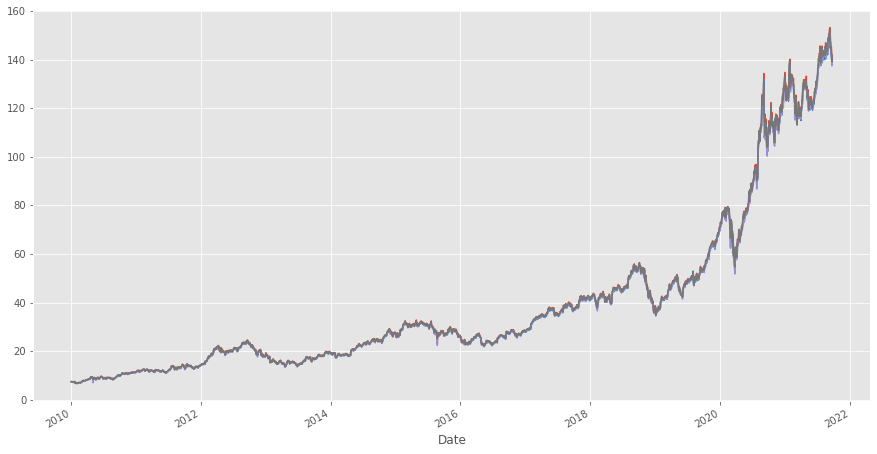

In [166]:
price["Open"].plot()
price["High"].plot()
price["Low"].plot()
price["Close"].plot()
fig = plt.gcf()
fig.set_size_inches(15, 8)

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Life Expectancy Data.csv',header = 1)

In [4]:
report = ProfileReport(df)
report.to_file('LED.html')

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]